# E-Commerce Transaction Analysis

E-commerce telah menjadi saluran baru untuk mendukung perkembangan bisnis. Melalui e-commerce, bisnis dapat memperoleh akses dan membangun kehadiran pasar yang lebih luas dengan menyediakan saluran distribusi yang lebih murah dan efisien untuk produk atau layanan mereka. E-commerce juga telah mengubah cara orang berbelanja dan mengonsumsi produk serta layanan. Banyak orang kini beralih ke komputer atau perangkat pintar mereka untuk memesan barang, yang dapat dengan mudah dikirim langsung ke rumah mereka.

Berikut adalah kumpulan data transaksi penjualan dari e-commerce (ritel online) yang berbasis di Inggris selama satu tahun pada 2019. Toko yang berlokasi di London ini telah menjual hadiah dan perlengkapan rumah untuk orang dewasa dan anak-anak melalui situs web sejak tahun 2007. Pelanggannya berasal dari berbagai negara di seluruh dunia dan biasanya melakukan pembelian langsung untuk diri mereka sendiri. Selain itu, ada juga bisnis kecil yang membeli dalam jumlah besar untuk dijual kembali kepada pelanggan lain melalui saluran ritel.

Deskripsi Variabel

- **TransactionNo (kategorikal):** nomor unik enam digit yang mendefinisikan setiap transaksi. Huruf “C” dalam kode menunjukkan adanya pembatalan transaksi.
- **Date (numerik):** tanggal ketika setiap transaksi dilakukan.
- **ProductNo (kategorikal):** kode unik lima atau enam digit yang digunakan untuk mengidentifikasi suatu produk tertentu.
- **Product (kategorikal):** nama produk atau barang.
- **Price (numerik):** harga setiap produk per unit dalam mata uang pound sterling (£).
- **Quantity (numerik):** jumlah setiap produk dalam satu transaksi. Nilai negatif menunjukkan transaksi yang dibatalkan.
- **Country (kategorikal):** nama negara tempat pelanggan tinggal.


Apa yang ingin kita ketahui?

1. Rata-rata total uang yang diperoleh dalam setiap transaksi
2. Rata-rata, maksimum, dan minimum jumlah produk yang dibeli
3. Transaksi mana yang memiliki harga tertinggi yang dibeli?
4. Bagaimana distribusi dari harga, jumlah, dan total pendapatan?
5. Bagaimana hubungan antara harga dan jumlah pembelian?
6. Negara mana yang paling banyak melakukan transaksi?
7. Produk apa yang paling sering dibeli?
8. Negara mana yang memberikan total pendapatan tertinggi dan terendah?
9. Bagaimana tren penjualan dari bulan ke bulan?
10. Produk apa yang memberikan pendapatan tertinggi dari total transaksi?

### Data Wrangling

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D:\PYTHON\LATIHAN\Pacmann\Data Source\SalesTransaction.csv')
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom
1,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom
2,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom
3,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom
4,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467441 entries, 0 to 467440
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  467441 non-null  object 
 1   Date           467441 non-null  object 
 2   ProductNo      467441 non-null  object 
 3   ProductName    467441 non-null  object 
 4   Price          467441 non-null  float64
 5   Quantity       467441 non-null  int64  
 6   Country        467441 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 25.0+ MB


In [5]:
data.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
Country          0
dtype: int64

In [6]:
# total spend
data['TotalSpend'] = data['Price'] * data['Quantity']
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalSpend
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64
1,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36
2,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80
3,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64
4,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,United Kingdom,255.60


In [7]:
# jumlah data duplikat
data.duplicated().sum()

4639

In [8]:
# cari data duplikat
data[data.duplicated(subset=['TransactionNo','ProductNo'], keep=False)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalSpend
858,581493,2019-12-09,79190B,Retro Plastic Polka Tray,7.24,15,Belgium,108.60
865,581493,2019-12-09,79190B,Retro Plastic Polka Tray,7.24,12,Belgium,86.88
936,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,United Kingdom,7.24
937,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,United Kingdom,7.24
948,581497,2019-12-09,22356,Charlotte Bag Pink Polkadot,7.24,25,United Kingdom,181.00
...,...,...,...,...,...,...,...,...
467228,540093,2019-01-04,21463,Mirrored Disco Ball,16.35,1,United Kingdom,16.35
467229,540093,2019-01-04,79321,Chilli Lights,15.32,3,United Kingdom,45.96
467231,540093,2019-01-04,22072,Red Retrospot Tea Cup And Saucer,14.09,1,United Kingdom,14.09
467336,540098,2019-01-04,20727,Lunch Bag Black Skull,5.97,1,United Kingdom,5.97


In [9]:
# hapus duplikat
data.drop_duplicates(keep='first', inplace=True)

In [10]:
data.duplicated().sum()

0

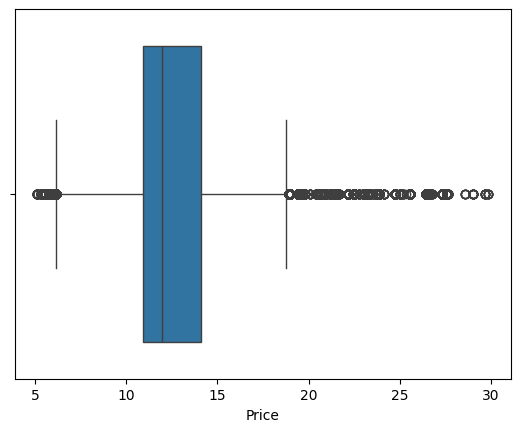

<Figure size 1000x400 with 0 Axes>

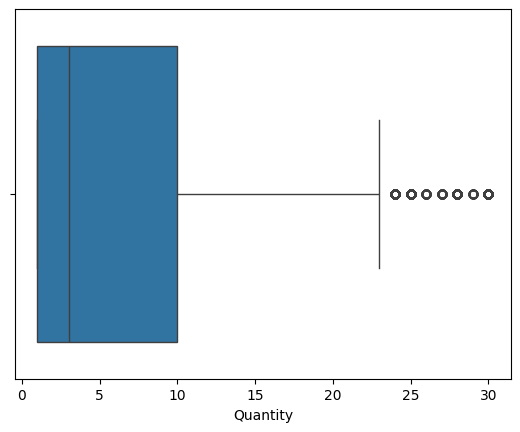

<Figure size 1000x400 with 0 Axes>

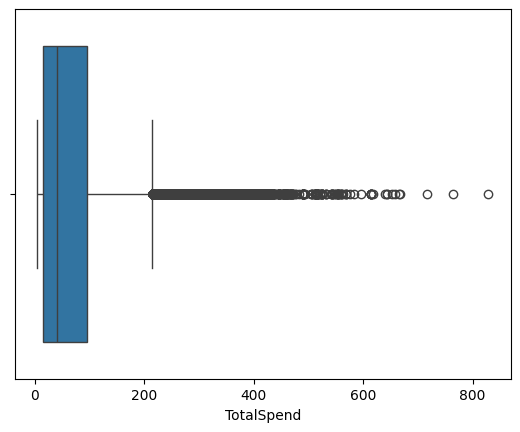

<Figure size 1000x400 with 0 Axes>

In [11]:
# kolom numerik
data_num = data.select_dtypes(exclude = 'object')

# identifikasi outlier
for i in data_num:
    sns.boxplot(data=data_num, x= i)
    plt.figure(figsize=(10,4))
    plt.show()

### Exploratory Data Analysis

**1. Rata-rata total uang yang diperoleh dalam setiap transaksi**

**2. Rata-rata, maksimum, dan minimum jumlah produk yang dibeli**

In [12]:
data[['Price','Quantity','TotalSpend']].describe()

,Price,Quantity,TotalSpend
count,462802.000000,462802.000000,462802.000000
mean,12.398777,6.048999,69.129744
std,3.880419,6.439166,71.719108
min,5.130000,1.000000,5.130000
25%,10.920000,1.000000,16.180000
50%,11.940000,3.000000,40.860000
75%,14.090000,10.000000,95.840000
max,29.860000,30.000000,828.600000


**Temuan**
- Rata-rata total belanja dalam satu transaksi pada tahun 2019 adalah `$68.7` dengan maksimum `$828.6` dan minimum `$5.13`
- Rata-rata jumlah pembelian dalam satu transaksi pada tahun 2019 adalah `6` dengan maksimum `30` dan minimum `1`. 

**3. Transaksi mana yang memiliki harga tertinggi yang dibeli?**

In [13]:
# transaksi total belanja maksimum
data.loc[data['Price'] == max(data['Price'])]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalSpend
209246,564825,2019-08-30,35637A,Ivory String Curtain With Pole,29.86,1,United Kingdom,29.86
209247,564837,2019-08-30,35637A,Ivory String Curtain With Pole,29.86,1,United Kingdom,29.86
261489,559923,2019-07-13,35638B,Pink/Blue String Curtain,29.86,1,United Kingdom,29.86
271836,559055,2019-07-05,35637A,Ivory String Curtain With Pole,29.86,1,United Kingdom,29.86
288224,557324,2019-06-20,35637C,Pink String Curtain With Pole,29.86,1,United Kingdom,29.86
434323,542622,2019-01-31,35637C,Pink String Curtain With Pole,29.86,1,United Kingdom,29.86


**4. Distribusi dari harga, jumlah, dan total uang**

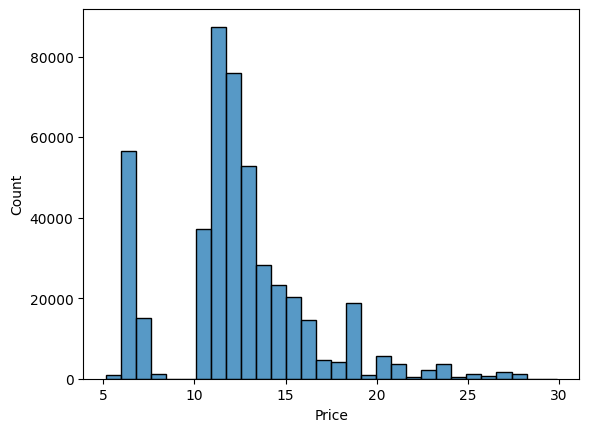

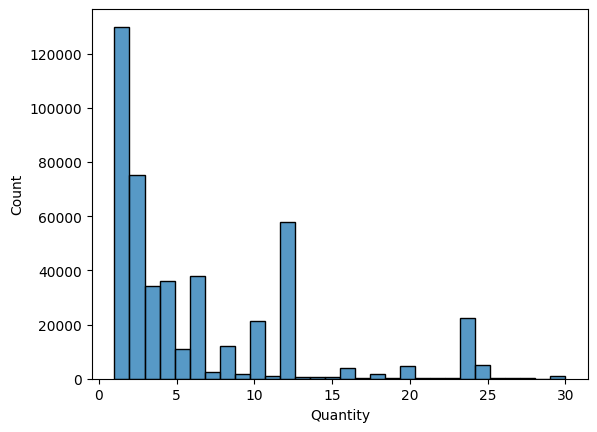

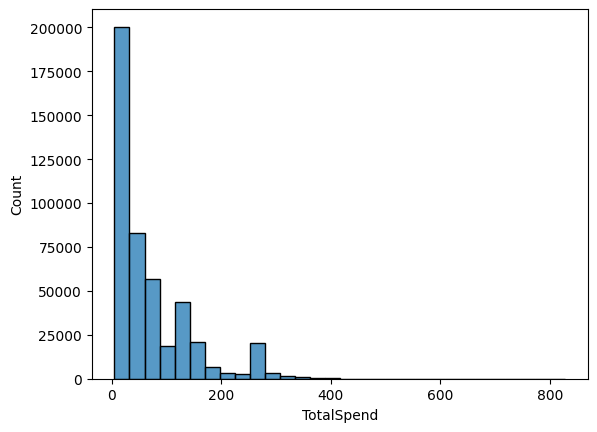

In [14]:
for i in data_num:
    sns.histplot(data=data, x=i, bins=30)
    plt.show()

**Temuan**
1. Variabel Quanitity cenderung menunjukkan kemiringan ke kanan, karena banyaknya orang yang membeli 1 item, yaitu lebih dari 120 ribu transaksi. Jumlah pembelian terbanyak kedua adalah 2 item yang hampir mencapai 80 ribu transaksi, kemudian yang ketiga adalah 12 item yang hampir mencapai 60 ribu transaksi.
2. Histogram Price menunjukkan banyak pembeli membeli barang dengan harga murah, namun banyak juga yang membeli dengan harga yang cenderung berada di tengah.
3. Pendapatan terbanyak berasal dari interval $0 - $200 yang berarti keuntungan didapatkan dari transaksi produk dalam jumlah banyak dengan harga yang murah.

In [15]:
dfMaxQuantity = data.loc[data['Quantity']==max(data['Quantity'])]
dfMaxQuantity['Price'].describe()

count    1103.000000
mean        9.550290
std         3.405221
min         5.550000
25%         6.190000
50%        10.470000
75%        11.740000
max        27.620000
Name: Price, dtype: float64

**Temuan**

Rata-rata (mean) dari harga (Price) adalah $9.55 dari setiap transaksi jumlah maksimum. Ini berarti pelanggan membeli produk dalam jumlah banyak pada produk yang memiliki harga yang murah.

In [16]:
dfMaxQuantity = data.loc[data['Quantity']==min(data['Quantity'])]
dfMaxQuantity['Price'].describe()

count    129899.000000
mean         13.334164
std           4.569820
min           5.130000
25%          11.120000
50%          12.770000
75%          15.320000
max          29.860000
Name: Price, dtype: float64

**Temuan**

Sebaliknya, rata-rata (mean) dari harga (Price) adalah $13.29 dari setiap transaksi jumlah minimum yang berarti pelanggan membeli produk dalam jumlah yang sedikit pada produk yang memiliki harga yang mahal.

**5. Bagaimana Hubungan antara variabel Price dan Quanitity?** 

<Axes: xlabel='Price', ylabel='Quantity'>

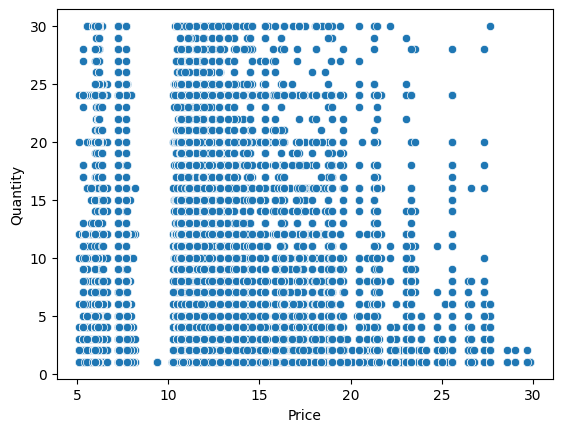

In [17]:
# hubungan harga dengan kuantitas
sns.scatterplot(data=data, x='Price', y='Quantity')

In [18]:
data[['Price','Quantity']].corr()

,Price,Quantity
Price,1.000000,-0.234944
Quantity,-0.234944,1.000000


korelasi bernilai negatif (berbalik nilai)

**6. Negara mana yang paling banyak melakukan transaksi?**

In [19]:
dfCountryTransaction = data['Country'].value_counts().reset_index()
dfCountryTransaction.columns = ['Country', 'Total Transaction']
top_10_country = dfCountryTransaction.head(10)
top_10_country

,Country,Total Transaction
0,United Kingdom,420491
1,France,9432
2,Germany,9128
3,EIRE,6725
4,Spain,2259
5,Switzerland,2058
6,Belgium,1783
7,Portugal,1667
8,Australia,1063
9,Austria,871


In [20]:
bottom_10_country = dfCountryTransaction.tail(10)
bottom_10_country

,Country,Total Transaction
27,Hong Kong,125
28,Greece,64
29,United Arab Emirates,63
30,European Community,58
31,RSA,57
32,Lebanon,45
33,Brazil,31
34,Czech Republic,22
35,Bahrain,15
36,Saudi Arabia,10


**Temuan**
10 negara yang paling banyak melakukan transaksi didominasi dari benua `eropa` dengan `United Kingdom` adalah negara yang paling banyak jumlah transaksi.
Sedangkan `Saudi Arabia` menjadi negara yang paling minim transaksi.

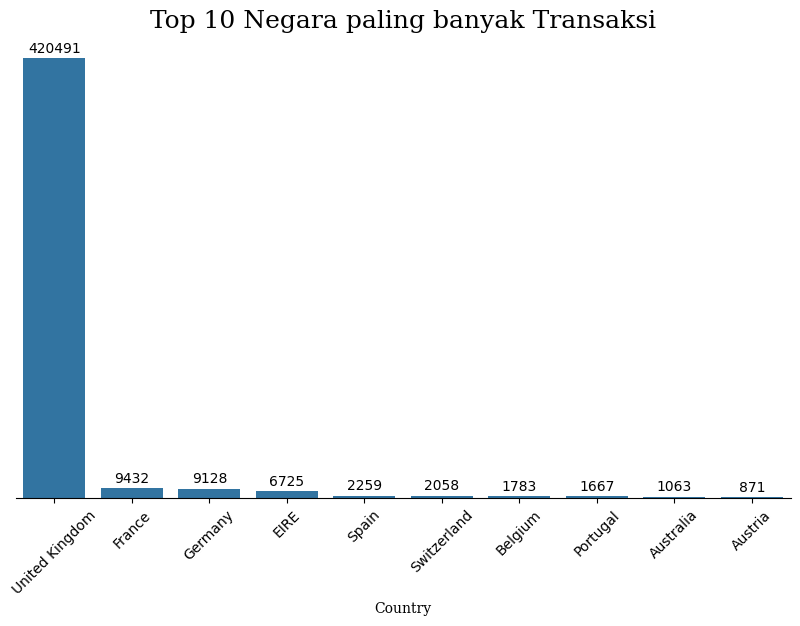

In [21]:
# visualisasi data
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_country, x='Country', y='Total Transaction')

# styling
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.title('Top 10 Negara paling banyak Transaksi', fontsize = 18, fontfamily = 'Serif')
plt.xlabel('Country', fontfamily = 'Serif')
sns.despine(left=True)
ax.get_yaxis().set_visible(False)
plt.xticks(rotation = 45)
plt.show()

**7. Produk apa yang paling sering dibeli?**

In [22]:
most_purchased_products = data['ProductName'].value_counts().reset_index()
most_purchased_products.columns = ['Product Name','Total Purchased']
most_purchased_products = most_purchased_products.head(10)

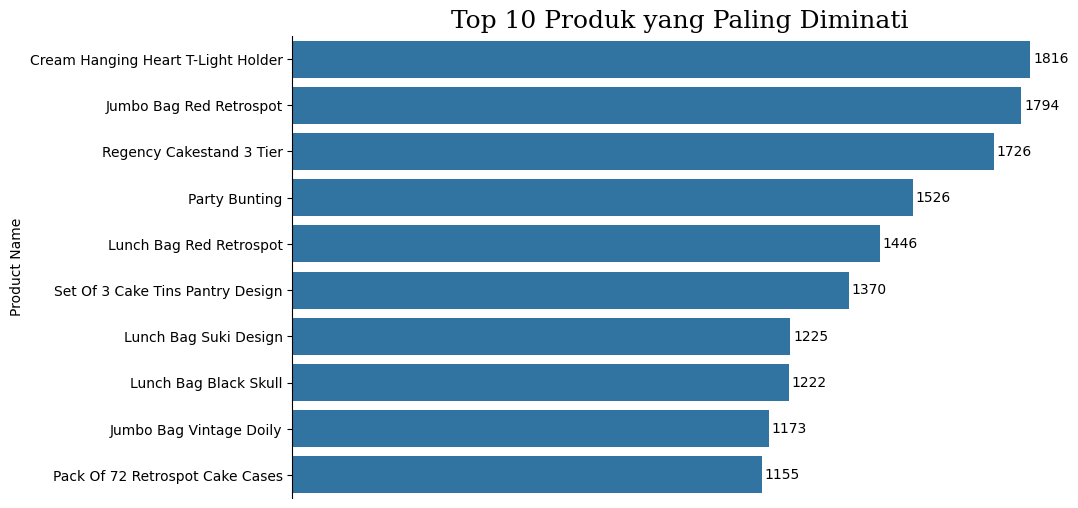

In [23]:
# visualisasi barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=most_purchased_products, y = 'Product Name', x = 'Total Purchased')

# styling
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
ax.get_xaxis().set_visible(False)
plt.title('Top 10 Produk yang Paling Diminati', fontsize = 18, fontfamily = 'Serif')
sns.despine(bottom=True)
plt.show()

**8. Negara mana yang memberikan total pendapatan tertinggi dan terendah?**

In [24]:
dfRevenuebyCountry = data.groupby('Country')['TotalSpend'].sum().sort_values(ascending=False).reset_index()
dfRevenuebyCountry.columns = ['Country','Total Revenue']
Top10TotalRevenuebyCountry = dfRevenuebyCountry.head(10)
Top10TotalRevenuebyCountry

,Country,Total Revenue
0,United Kingdom,27656938.70
1,Germany,960490.61
2,France,895581.06
3,EIRE,755003.03
4,Switzerland,229693.13
5,Spain,216398.56
6,Belgium,185119.66
7,Portugal,135328.89
8,Netherlands,111316.23
9,Australia,93722.56


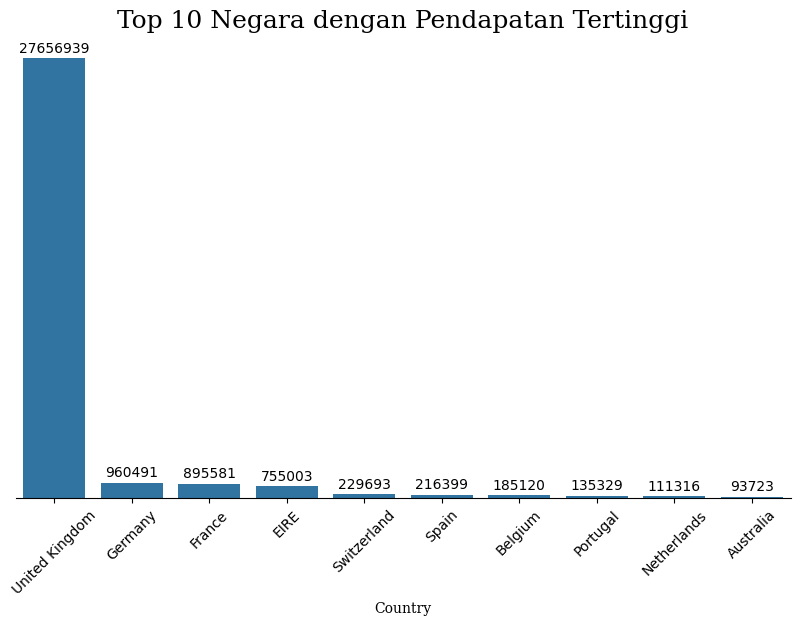

In [25]:
# visualisasi data
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Top10TotalRevenuebyCountry, x='Country', y='Total Revenue')

# styling
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.title('Top 10 Negara dengan Pendapatan Tertinggi', fontsize = 18, fontfamily = 'Serif')
plt.xlabel('Country', fontfamily = 'Serif')
sns.despine(left=True)
ax.get_yaxis().set_visible(False)
plt.xticks(rotation = 45)
plt.show()

In [26]:
Bottom10TotalRevenuebyCountry = dfRevenuebyCountry.tail(10)
Bottom10TotalRevenuebyCountry

,Country,Total Revenue
27,Japan,11771.86
28,United Arab Emirates,9602.86
29,Greece,8162.85
30,European Community,6239.45
31,Lebanon,5692.32
32,Czech Republic,5237.44
33,Brazil,4652.27
34,RSA,4259.83
35,Bahrain,1428.18
36,Saudi Arabia,1035.85


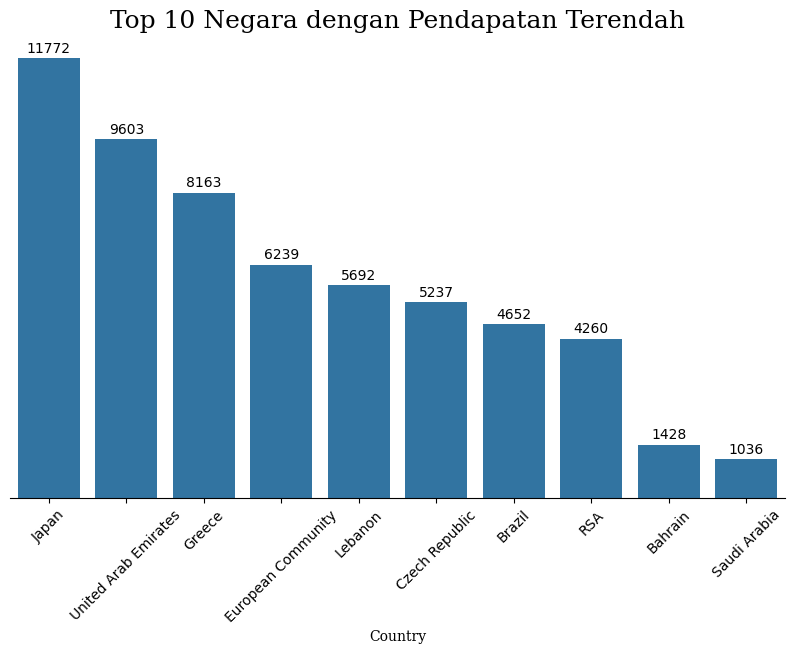

In [27]:
# visualisasi data
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Bottom10TotalRevenuebyCountry, x='Country', y='Total Revenue')

# styling
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.title('Top 10 Negara dengan Pendapatan Terendah', fontsize = 18, fontfamily = 'Serif')
plt.xlabel('Country', fontfamily = 'Serif')
sns.despine(left=True)
ax.get_yaxis().set_visible(False)
plt.xticks(rotation = 45)
plt.show()

**9. Bagaimana tren penjualan dari bulan ke bulan?**

In [28]:
# konversi tipe data date
data['Date'] = pd.to_datetime(data['Date'], yearfirst=True)

data['Month'] = data['Date'].dt.month
trend_data = data[['TransactionNo','Date','Month','ProductNo','ProductName','Price','Quantity','Country','TotalSpend']]

In [29]:
dfRevenueTrend = trend_data.groupby('Month')['TotalSpend'].sum().reset_index()
dfRevenueTrend

,Month,TotalSpend
0,1,2210574.68
1,2,1838506.23
2,3,2450647.33
3,4,2033377.23
4,5,2569863.30
5,6,2419846.54
6,7,2569210.91
7,8,2541191.90
8,9,3756135.68
9,10,4130546.67


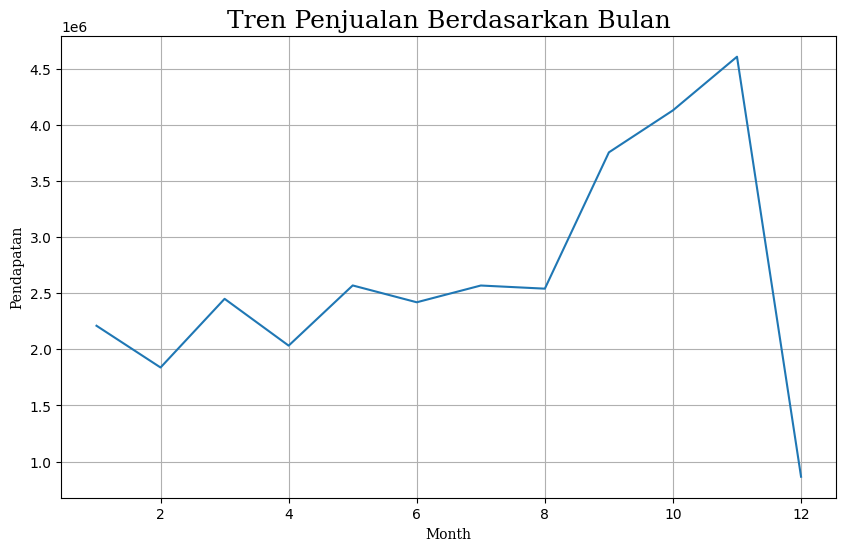

In [30]:
# tren penjualan dari bulan ke bulan 
plt.figure(figsize=(10,6))
sns.lineplot(data=dfRevenueTrend, x='Month', y='TotalSpend')

# styling 
plt.title('Tren Penjualan Berdasarkan Bulan', fontsize = 18, fontfamily = 'Serif')
plt.xlabel('Month', fontfamily = 'Serif')
plt.ylabel('Pendapatan', fontfamily = 'Serif')
plt.grid(visible=True)
plt.show()

**10. Produk apa yang memberikan pendapatan tertinggi dari total transaksi?**

In [31]:
Top10RevenuebyProducts = data.groupby('ProductName')['TotalSpend'].sum().sort_values(ascending=False).reset_index()
Top10RevenuebyProducts.columns = ['Product Name','Revenue']
Top10RevenuebyProducts = Top10RevenuebyProducts.head(10)

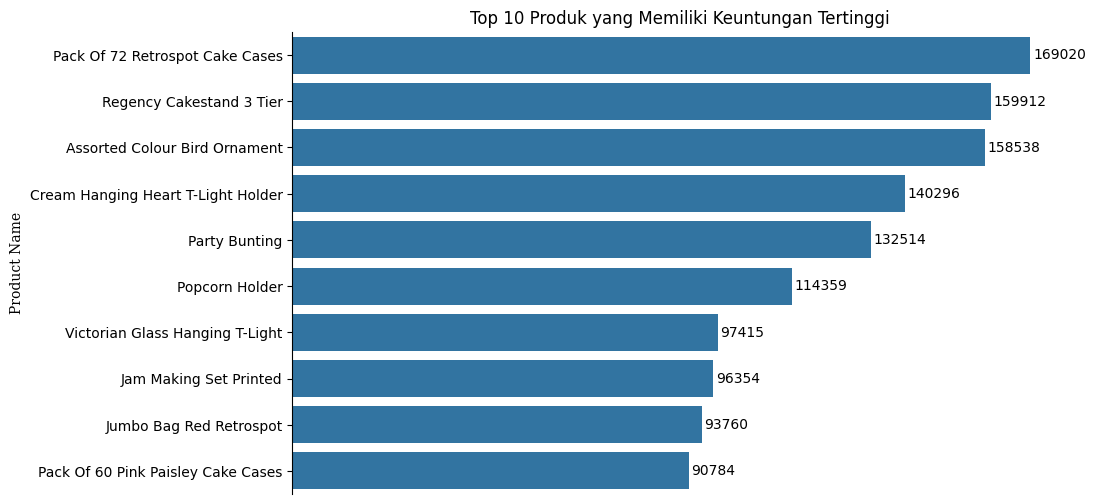

In [32]:
# plotting
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Top10RevenuebyProducts, y='Product Name', x='Revenue')

#styling
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.title('Top 10 Produk yang Memiliki Keuntungan Tertinggi')
sns.despine(bottom=True)
plt.ylabel('Product Name', fontfamily = 'Serif')
ax.get_xaxis().set_visible(False)
plt.xticks(rotation = 45)
plt.show()

### Resume

1. Rata-rata total uang yang diperoleh dalam setiap transaksi

2. Rata-rata, maksimum, dan minimum jumlah produk yang dibeli

- Rata-rata total belanja dalam satu transaksi pada tahun 2019 adalah `$68.7` dengan maksimum `$828.6` dan minimum `$5.13`
- Rata-rata jumlah pembelian dalam satu transaksi pada tahun 2019 adalah `6` dengan maksimum `30` dan minimum `1`. 

3. Transaksi mana yang memiliki harga tertinggi yang dibeli?

Transaksi produk dengan harga tertinggi yang dibeli yaitu berjumlah 6 transaksi dengan nomor transaksi `564825`, `564837`, `559923`, `559055`, `557324`, `542622` yang dilakukan di `United Kingdom`.

4. Bagaimana distribusi dari harga, jumlah, dan total pendapatan?

- Variabel Quanitity cenderung menunjukkan kemiringan ke kanan, karena banyaknya orang yang membeli 1 item, yaitu lebih dari `120 ribu` transaksi. Jumlah pembelian terbanyak kedua adalah 2 item yang hampir mencapai 80 ribu transaksi, kemudian yang ketiga adalah 12 item yang hampir mencapai `60 ribu` transaksi.
- Histogram Price menunjukkan banyak pembeli membeli barang dengan harga murah, namun banyak juga yang membeli dengan harga yang cenderung berada di tengah.
- Pendapatan terbanyak berasal dari interval $0 - $200 yang berarti keuntungan didapatkan dari transaksi produk dalam jumlah banyak dengan harga yang murah.

5. Bagaimana hubungan antara harga dan jumlah pembelian?

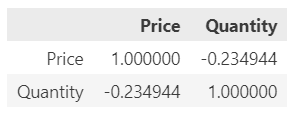

Korelasi bernilai negatif yang berarti berbalik nilai, sesuai dengan temuan bahwa `pelanggan lebih menyukai produk yang harganya murah dibandingkan produk yang harganya mahal.`

6. Negara mana yang paling banyak melakukan transaksi?

10 negara yang paling banyak melakukan transaksi didominasi dari benua `eropa` dengan `United Kingdom` adalah negara yang paling banyak jumlah transaksi, yaitu sebanyak 420.491 jumlah transaksi.
Sedangkan `Saudi Arabia` menjadi negara yang paling minim transaksi, yaitu hanyak sebanyak 10 transaksi.

7. Produk apa yang paling sering dibeli?

10 Produk yang paling sering dibeli di antaranya adalah 
- Cream Hanging Heart T-Light Holder sebanyak 1.816 
- Jumbo Bag Red Retrospot sebanyak 1.794
- Regency Cakestand 3 Tier sebanyak 1.726
- Party Bunting sebanyak 1.526
- Lunch Bag Red Retrospot sebanyak 1.446
- Set of 3 Cake Tins Pantry Design sebanyak 1.370
- Lunch Bag Suki Design sebanyak 1.225
- Lunch Bag Black Skull sebanyak 1.222
- Jumbo Bag Vintage Doily sebanyak 1.173
- Pack of 72 Retrospot Cake Cases sebanyak 1.155

8. Negara mana yang memberikan total pendapatan tertinggi dan terendah?

`United Kingdom` menjadi negara yang memberikan pendapatan paling besar jauh melampaui negara-negara yang lain yaitu sekitar `$27.656.938` setelah itu disusul negara-negara eropa yang lain. `Australia` juga termasuk negara yang memberikan pendapatan tinggi yaitu sekitar `$93.722`. Sedangkan `Saudi Arabia` menjadi negara yang paling memberikan pendapatan terendah yaitu hanya sekitar `$1.035`

9. Bagaimana tren penjualan dari bulan ke bulan?

Tren dari bulan ke bulan bersifat fluktuatif, pendapatan tertinggi didapatkan pada bulan November yaitu sekitar `$4.608.489`. Namun, setelah itu keuntungan turun drastis menjadi `$864.993`

10. Produk apa yang memberikan pendapatan tertinggi dari total transaksi?

Top 10 Produk yang memberikan keuntungan tertinggi di antaranya:
- Pack of 72 Retrospot Cake Cases dengan keuntungan $169.020
- Regency Cakestand 3 Tier dengan keuntungan $159.912
- Assorted Colour Bird Ornament dengan keuntungan $158.538
- Cream Hanging Heart T-Light Holder dengan keuntungan $140.296
- Party Bunting dengan keuntungan $132.514
- Popcorn Holder dengan keuntungan $114.359
- Victorian Glass Hanging T-Light dengan keuntungan $97.415
- Jam Making Set Printed dengan keuntungan $96.354
- Jumbo Bag Red Retrospot dengan keuntungan $93.760
- Pack of 60 Pink Paisley Cake Cases dengan keuntungan $90.784

### Rekomendasi

1. Fokuskan stok dan promosi pada produk dengan harga yang murah dan permintaan yang tinggi. 
2. Terapkan strategi diskon kuantitas (semakin banyak beli, semakin murah per item) pada produk yang mahal.
3. Gunakan bundle pricing dengan menggabungkan beberapa produk murah dalam satu paket hemat.
4. Tingkatkan distribusi dan ketersediaan produk di negara United Kingdom karena memiliki potensi yang sangat besar.
5. Jika pasar menunjukkan potensi pertumbuhan jangka panjang, pertahankan dengan strategi efisiensi biaya dan promosi terbatas pada negara yang minim pelanggan.

### Dasboard Visualisasi Data
https://public.tableau.com/app/profile/zulyan.firdaus/viz/SalesTransactionDashboard_17635251486330/Dashboard1?publish=yes